In [1]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", '3.0.0')

Found cached dataset cnn_dailymail (/Users/ethancavill/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# There are three dicts within the dataset - train, validate, test
df = pd.DataFrame(dataset['train'])
df.describe()

,article,highlights,id
count,287113,287113,287113
unique,284005,282197,287113
top,"SHANGHAI, China (CNN) -- If it weren't for th...",This page includes the show Transcript and the...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
freq,3,83,1


In [13]:
# The shape represents dimensions (rows, cols)
# df2 = pd.DataFrame({'col1': [1, 2, 3], 'col2': [3, 4, 5]})
# print(f'Shape vector representing rows, cols: {df2.shape}')

# Has keys {'article', highlights, id}
num_documents = df.shape[0]
print(f"DF Shape, Number of documents: {df.shape, num_documents}")

# Create a new dataframe column for the character lengths of each summary and article
df['article_char_len'] = df['article'].apply(len)
df['summary_char_len'] = df['highlights'].apply(len)

# Use these new columns to calculate some basic stats
max_article_char_len = df['article_char_len'].max()
mean_article_char_len = df['article_char_len'].mean()
std_article_char_len = df['article_char_len'].std()

max_summary_char_len = df['summary_char_len'].max()
mean_summary_char_len = df['summary_char_len'].mean()
std_summary_char_len = df['summary_char_len'].std()

# 1 std deviation represents 68% of the dataset, 2 represents 95 and 3 represents 99.7.
# This means that 68% of the data will have a character length within +- 1 std dev of the mean.
print(f"\nArticle character length\nMax: {max_article_char_len}, Mean: {mean_article_char_len}, 1 Std Dev: {std_article_char_len}, 2 Std Dev: {std_article_char_len * 2}\n")
print(f"Summary charachter length\nMax: {max_summary_char_len}, Mean: {mean_summary_char_len}, 1 Std Dev: {std_summary_char_len}, 2 Std Dev: {std_summary_char_len * 2}")

DF Shape, Number of documents: ((287113, 5), 287113)

Article character length
Max: 15925, Mean: 4033.6617220397543, 1 Std Dev: 1954.33953682022, 2 Std Dev: 3908.67907364044

Summary charachter length
Max: 7388, Mean: 294.7703900554834, 1 Std Dev: 120.19740529203612, 2 Std Dev: 240.39481058407225


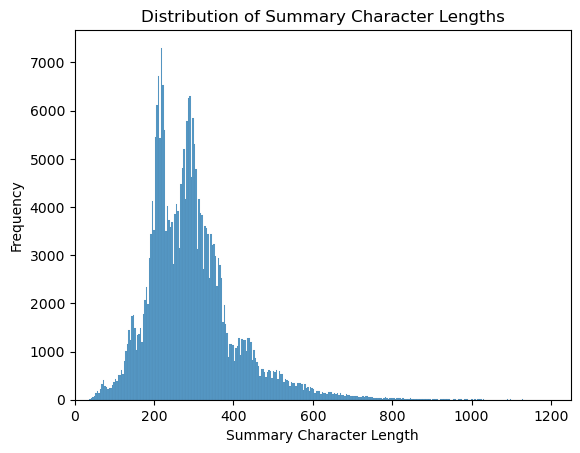

In [19]:
# Histogram for summary lengths
sns.histplot(df['summary_char_len'])
plt.title('Distribution of Summary Character Lengths')
plt.xlabel('Summary Character Length')
plt.ylabel('Frequency')
plt.xlim(0, 1250)  
plt.show()

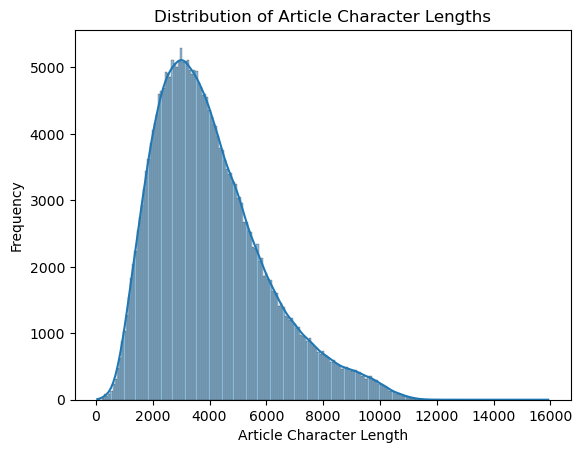

In [18]:
# Histogram for article lengths
sns.histplot(df['article_char_len'], kde=True)
plt.title('Distribution of Article Character Lengths')
plt.xlabel('Article Character Length')
plt.ylabel('Frequency')
plt.show()

In [54]:
df2 = pd.DataFrame(dataset['train'])

# Create a new column 'source' and populate it based on the presence of '(CNN)' in the 'article' column
df2['source'] = df2['article'].apply(lambda x: 'CNN' if '(CNN)' in x else 'DM')

# Add more columns to calculate some basic row stats
df2['article_char_len'] = df2['article'].apply(len)
df2['article_token_len'] = df2['article'].apply(lambda x: len(x.split()))
df2['article_sentence_len'] = df2['article'].apply(lambda x: len(x.split('. ')))
df2['article_sentence_len2'] = df2['article'].apply(lambda x: len(x.split('.')))


# Filter the DataFrame on the 'source' column
cnn_df = df2[df2['source'] == 'CNN']
dm_df = df2[df2['source'] == 'DM']

In [55]:
# This gives us a pretty accurate split on the data
print(cnn_df.shape)
print(dm_df.shape)

(75555, 8)
(211558, 8)


In [60]:
mean_cnn_article_len = cnn_df['article_char_len'].mean()
std_cnn_article_len = cnn_df['article_char_len'].std()
mean_token_cnn_len = cnn_df['article_token_len'].mean()
std_token_cnn_len = cnn_df['article_token_len'].std()
mean_sentence_cnn_len = cnn_df['article_sentence_len'].mean()
std_sentence_cnn_len = cnn_df['article_sentence_len'].std()
mean_sentence_cnn_len2 = cnn_df['article_sentence_len2'].mean()

mean_dm_article_len = dm_df['article_char_len'].mean()
std_dm_article_len = dm_df['article_char_len'].std()
mean_token_dm_len = dm_df['article_token_len'].mean()
std_token_dm_len = dm_df['article_token_len'].std()
mean_sentence_dm_len = dm_df['article_sentence_len'].mean()
std_sentence_dm_len = dm_df['article_sentence_len'].std()
mean_sentence_dm_len2 = dm_df['article_sentence_len2'].mean()

data = {
    'Source': ['CNN', 'DM'],
    'Mean Char Len': [mean_cnn_article_len, mean_dm_article_len],
    'Std Dev Char Len': [std_cnn_article_len, std_dm_article_len],
    'Mean Token Len': [mean_token_cnn_len, mean_token_dm_len],
    'Std Dev Token Len': [std_token_cnn_len, std_token_dm_len],
    'Mean Sentence Len': [mean_sentence_cnn_len, mean_sentence_dm_len],
    'Mean Sentence Len 2': [mean_sentence_cnn_len2, mean_sentence_dm_len2],
    'Std Dev Sentence Len': [std_sentence_cnn_len, std_sentence_dm_len]
}

stats_df = pd.DataFrame(data).set_index('Source')
stats_df

,Mean Char Len,Std Dev Char Len,Mean Token Len,Std Dev Token Len,Mean Sentence Len,Mean Sentence Len 2,Std Dev Sentence Len
Source,,,,,,,
CNN,3857.467474,1974.062986,645.907723,332.312665,31.022725,37.633737,17.363548
DM,4096.587049,1943.384438,708.285231,336.465887,39.268560,44.837832,23.812233
